In [1]:
import alphalens as al
import pandas as pd
from sklearn.preprocessing import PowerTransformer
df=pd.read_pickle("alpha38.pkl")
print(df)

                                          open        high         low  \
time                asset                                                
2022-01-01 12:00:00 ADA-USDT_spot     1.319000    1.326000    1.318000   
                    ALGO-USDT_spot    1.640300    1.650900    1.639700   
                    AR-USDT_spot     61.189999   61.650002   61.180000   
                    AVAX-USDT_spot  109.089996  109.629997  109.000000   
                    AXS-USDT_spot    91.820000   92.339996   91.820000   
...                                        ...         ...         ...   
2022-12-30 20:00:00 XLM-USDT_spot     0.072100    0.072200    0.072000   
                    XMR-USDT_spot   146.199997  146.399994  146.199997   
                    XRP-USDT_spot     0.343900    0.344100    0.343200   
                    XTZ-USDT_spot     0.722000    0.724000    0.721000   
                    ZEC-USDT_spot    37.599998   37.599998   37.599998   

                                     

In [2]:
df_al = df.copy()
df_al.index.set_names(['date', 'asset'], inplace=True)
print(df_al)

                                          open        high         low  \
date                asset                                                
2022-01-01 12:00:00 ADA-USDT_spot     1.319000    1.326000    1.318000   
                    ALGO-USDT_spot    1.640300    1.650900    1.639700   
                    AR-USDT_spot     61.189999   61.650002   61.180000   
                    AVAX-USDT_spot  109.089996  109.629997  109.000000   
                    AXS-USDT_spot    91.820000   92.339996   91.820000   
...                                        ...         ...         ...   
2022-12-30 20:00:00 XLM-USDT_spot     0.072100    0.072200    0.072000   
                    XMR-USDT_spot   146.199997  146.399994  146.199997   
                    XRP-USDT_spot     0.343900    0.344100    0.343200   
                    XTZ-USDT_spot     0.722000    0.724000    0.721000   
                    ZEC-USDT_spot    37.599998   37.599998   37.599998   

                                     

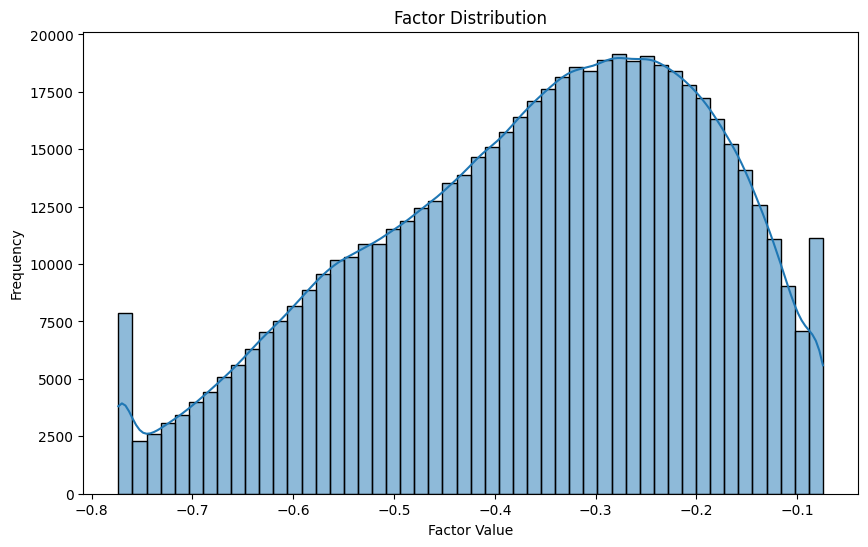

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
df_al = df_al.copy()
lower, upper = np.percentile(df_al["factor"], [1, 99])  # 计算 1% 和 99% 分位数
df_al["factor"] = np.clip(df_al["factor"], lower, upper)  # 裁剪极端值
# df_al["factor"] = np.sqrt(abs(df_al["factor"]))  # 取平方根，避免负数问题
plt.figure(figsize=(10, 6))
sns.histplot(df_al["factor"], bins=50, kde=True)  # 直方图 + 密度曲线
plt.xlabel("Factor Value")
plt.ylabel("Frequency")
plt.title("Factor Distribution")
plt.show()

In [4]:
df_al = df_al.dropna(subset=['factor', '10D', '30D', '50D'])
print(df_al)

                                          open        high         low  \
date                asset                                                
2022-01-01 12:00:00 ADA-USDT_spot     1.319000    1.326000    1.318000   
                    ALGO-USDT_spot    1.640300    1.650900    1.639700   
                    AR-USDT_spot     61.189999   61.650002   61.180000   
                    AVAX-USDT_spot  109.089996  109.629997  109.000000   
                    AXS-USDT_spot    91.820000   92.339996   91.820000   
...                                        ...         ...         ...   
2022-12-29 20:00:00 XLM-USDT_spot     0.071300    0.071300    0.071100   
                    XMR-USDT_spot   146.100006  146.399994  145.800003   
                    XRP-USDT_spot     0.344200    0.344600    0.343600   
                    XTZ-USDT_spot     0.724000    0.725000    0.719000   
                    ZEC-USDT_spot    38.000000   38.000000   37.799999   

                                     

In [5]:
factor = df_al['factor']
factor.index = factor.index.rename(['date', 'asset'])  # 确保索引名称
forward_returns = df_al[['10D', '30D', '50D']]
print(forward_returns)
print(df_al)

                                         10D       30D       50D
date                asset                                       
2022-01-01 12:00:00 ADA-USDT_spot   0.001508  0.016591  0.034691
                    ALGO-USDT_spot  0.005939  0.056182  0.076061
                    AR-USDT_spot    0.004059  0.059101  0.052444
                    AVAX-USDT_spot -0.000821  0.029919  0.055824
                    AXS-USDT_spot   0.002166  0.013320  0.016786
...                                      ...       ...       ...
2022-12-29 20:00:00 XLM-USDT_spot  -0.001403  0.008415  0.000000
                    XMR-USDT_spot  -0.002058 -0.002058 -0.004115
                    XRP-USDT_spot  -0.005523 -0.015698 -0.018895
                    XTZ-USDT_spot  -0.004155 -0.006925 -0.024931
                    ZEC-USDT_spot  -0.002639 -0.002639 -0.021108

[598950 rows x 3 columns]
                                          open        high         low  \
date                asset                             

                          10D       30D       50D
date                                             
2022-01-01 12:00:00 -0.008403 -0.033661 -0.064970
2022-01-02 12:00:00 -0.128451 -0.011861 -0.054886
2022-01-03 12:00:00  0.344826  0.082449  0.088980
2022-01-04 12:00:00 -0.078039 -0.181194 -0.173030
2022-01-05 12:00:00 -0.022425  0.026074  0.114142
...                       ...       ...       ...
2022-12-25 12:00:00  0.001681  0.057191 -0.160928
2022-12-26 12:00:00  0.104973 -0.100865 -0.159568
2022-12-27 12:00:00 -0.192989 -0.100792  0.010996
2022-12-28 12:00:00 -0.258487 -0.208547 -0.151212
2022-12-29 12:00:00 -0.030740 -0.152461 -0.158947

[363 rows x 3 columns]


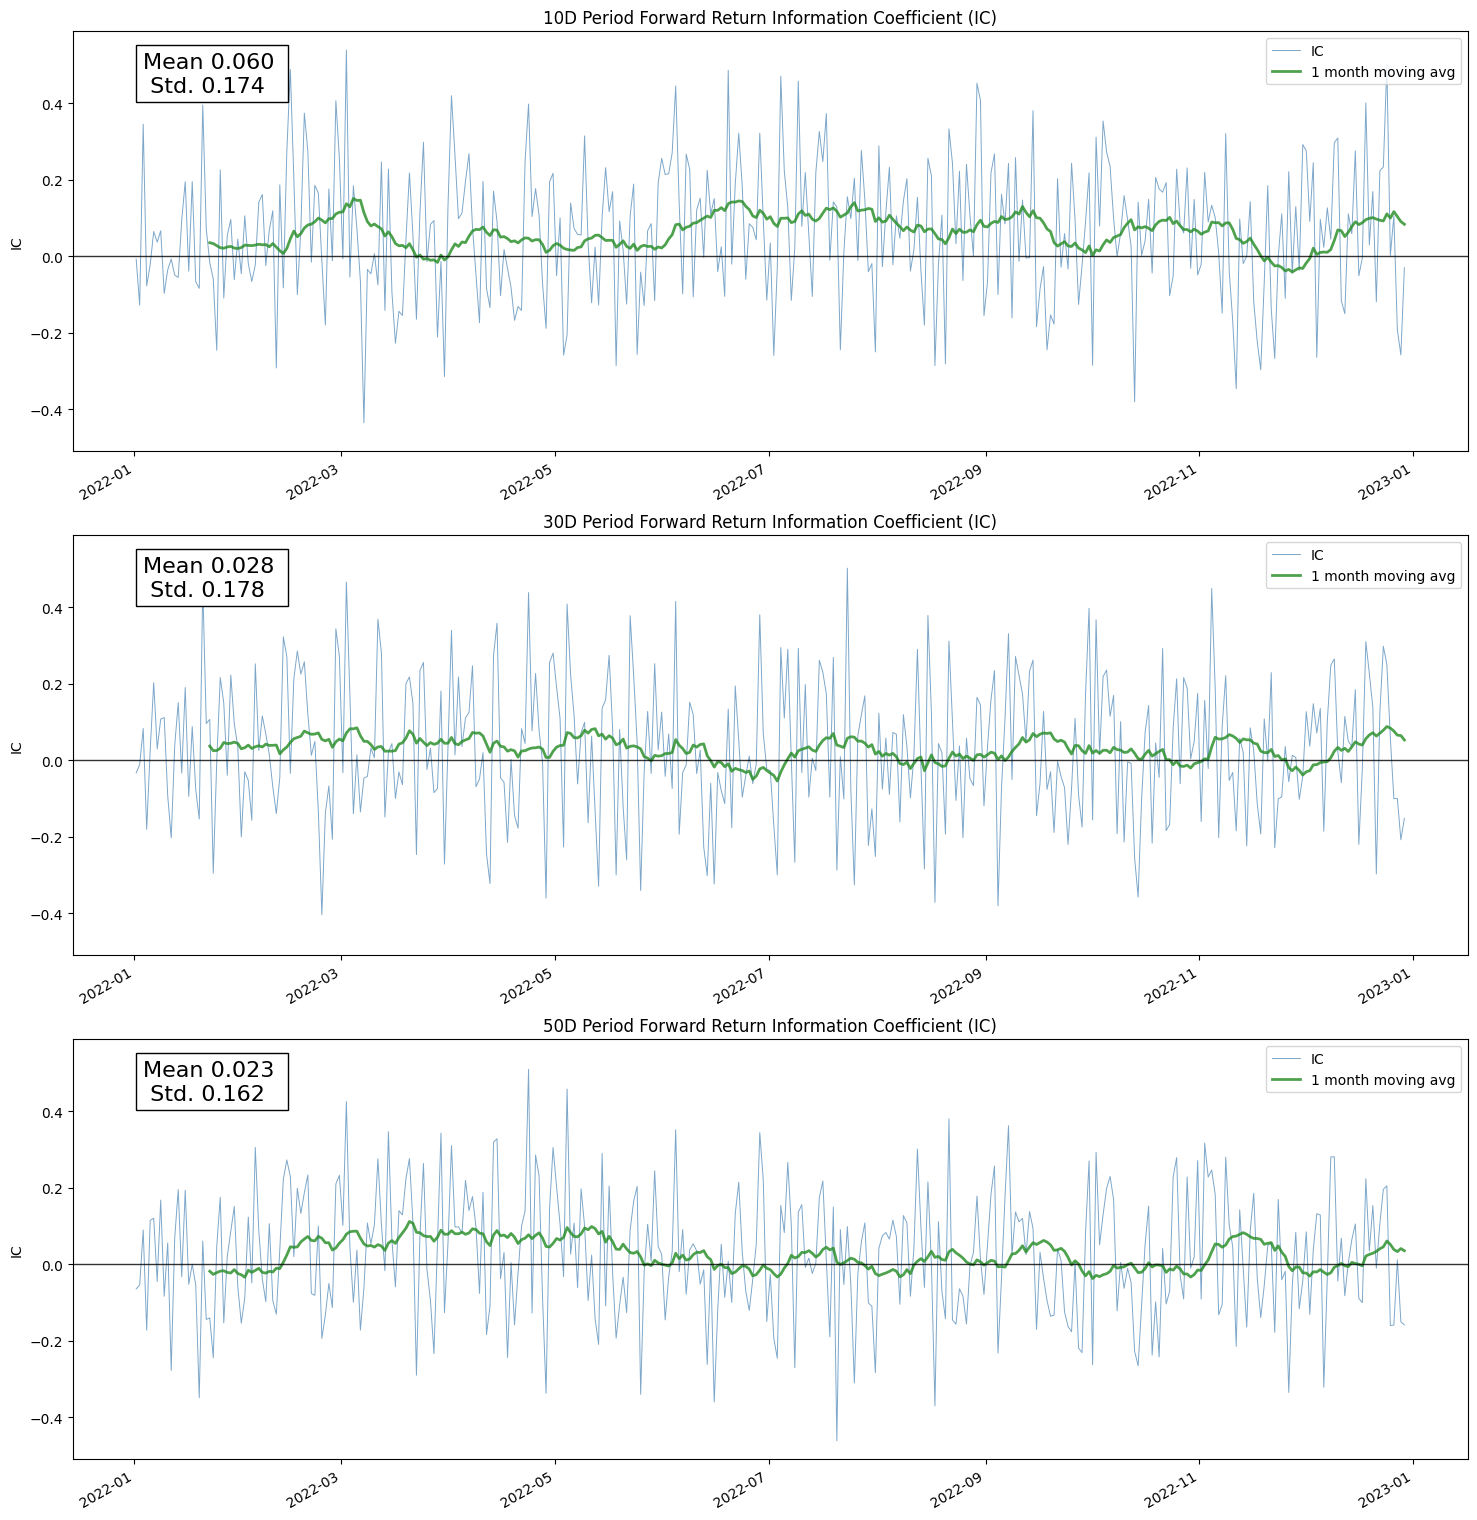

In [6]:
ic = al.performance.factor_information_coefficient(df_al)
print(ic)
import alphalens.plotting as alplt
import matplotlib.pyplot as plt
alplt.plot_ic_ts(ic)
plt.show()

In [7]:
# 1) 生成 'factor_quantile'
df_al['factor_quantile'] = al.utils.quantize_factor(
    df_al, 
    quantiles=5,
    bins=None,               # 或者用bins来分箱
)

# 2) 去除 NaN, 避免报错
df_al.dropna(subset=['factor', '10D', '30D', '50D', 'factor_quantile'], inplace=True)

# 3) 再次调用 mean_return_by_quantile
mean_ret, std_err = al.performance.mean_return_by_quantile(df_al, by_date=True)
print(mean_ret)


                                          10D       30D       50D
factor_quantile date                                             
1               2022-01-01 12:00:00 -0.002317 -0.001897 -0.007644
                2022-01-01 12:15:00 -0.004267 -0.005721 -0.005200
                2022-01-01 12:30:00  0.003150  0.019608  0.027442
                2022-01-01 12:45:00 -0.001878 -0.000048  0.006036
                2022-01-01 13:00:00  0.002151  0.001488  0.007415
...                                       ...       ...       ...
5               2022-12-29 19:00:00  0.001676  0.011065  0.013694
                2022-12-29 19:15:00 -0.007143  0.010052  0.006854
                2022-12-29 19:30:00 -0.002151 -0.004343 -0.005132
                2022-12-29 19:45:00 -0.000309 -0.000739 -0.004213
                2022-12-29 20:00:00  0.002843  0.006933 -0.001356

[59895 rows x 3 columns]


Quantiles Statistics


min       max      mean       std   count  count %
factor_quantile                                                         
1               -0.773527 -0.357129 -0.603431  0.089172  119790     20.0
2               -0.725927 -0.250341 -0.446677  0.073184  119790     20.0
3               -0.599892 -0.175043 -0.343971  0.065322  119790     20.0
4               -0.503842 -0.116753 -0.256658  0.058145  119790     20.0
5               -0.394491 -0.074533 -0.159369  0.055105  119790     20.0

Returns Analysis


10D    30D    50D
Ann. alpha                                     0.009  0.002  0.000
beta                                           0.005  0.003  0.000
Mean Period Wise Return Top Quantile (bps)     3.273  1.228  0.583
Mean Period Wise Return Bottom Quantile (bps) -3.957 -1.168 -0.754
Mean Period Wise Spread (bps)                  7.229  2.401  1.340

D:\python3\lib\site-packages\alphalens\tears.py:262: UserWarning: 'freq' not set in factor_data index: assuming business day
  warnings.warn(


<Figure size 640x480 with 0 Axes>

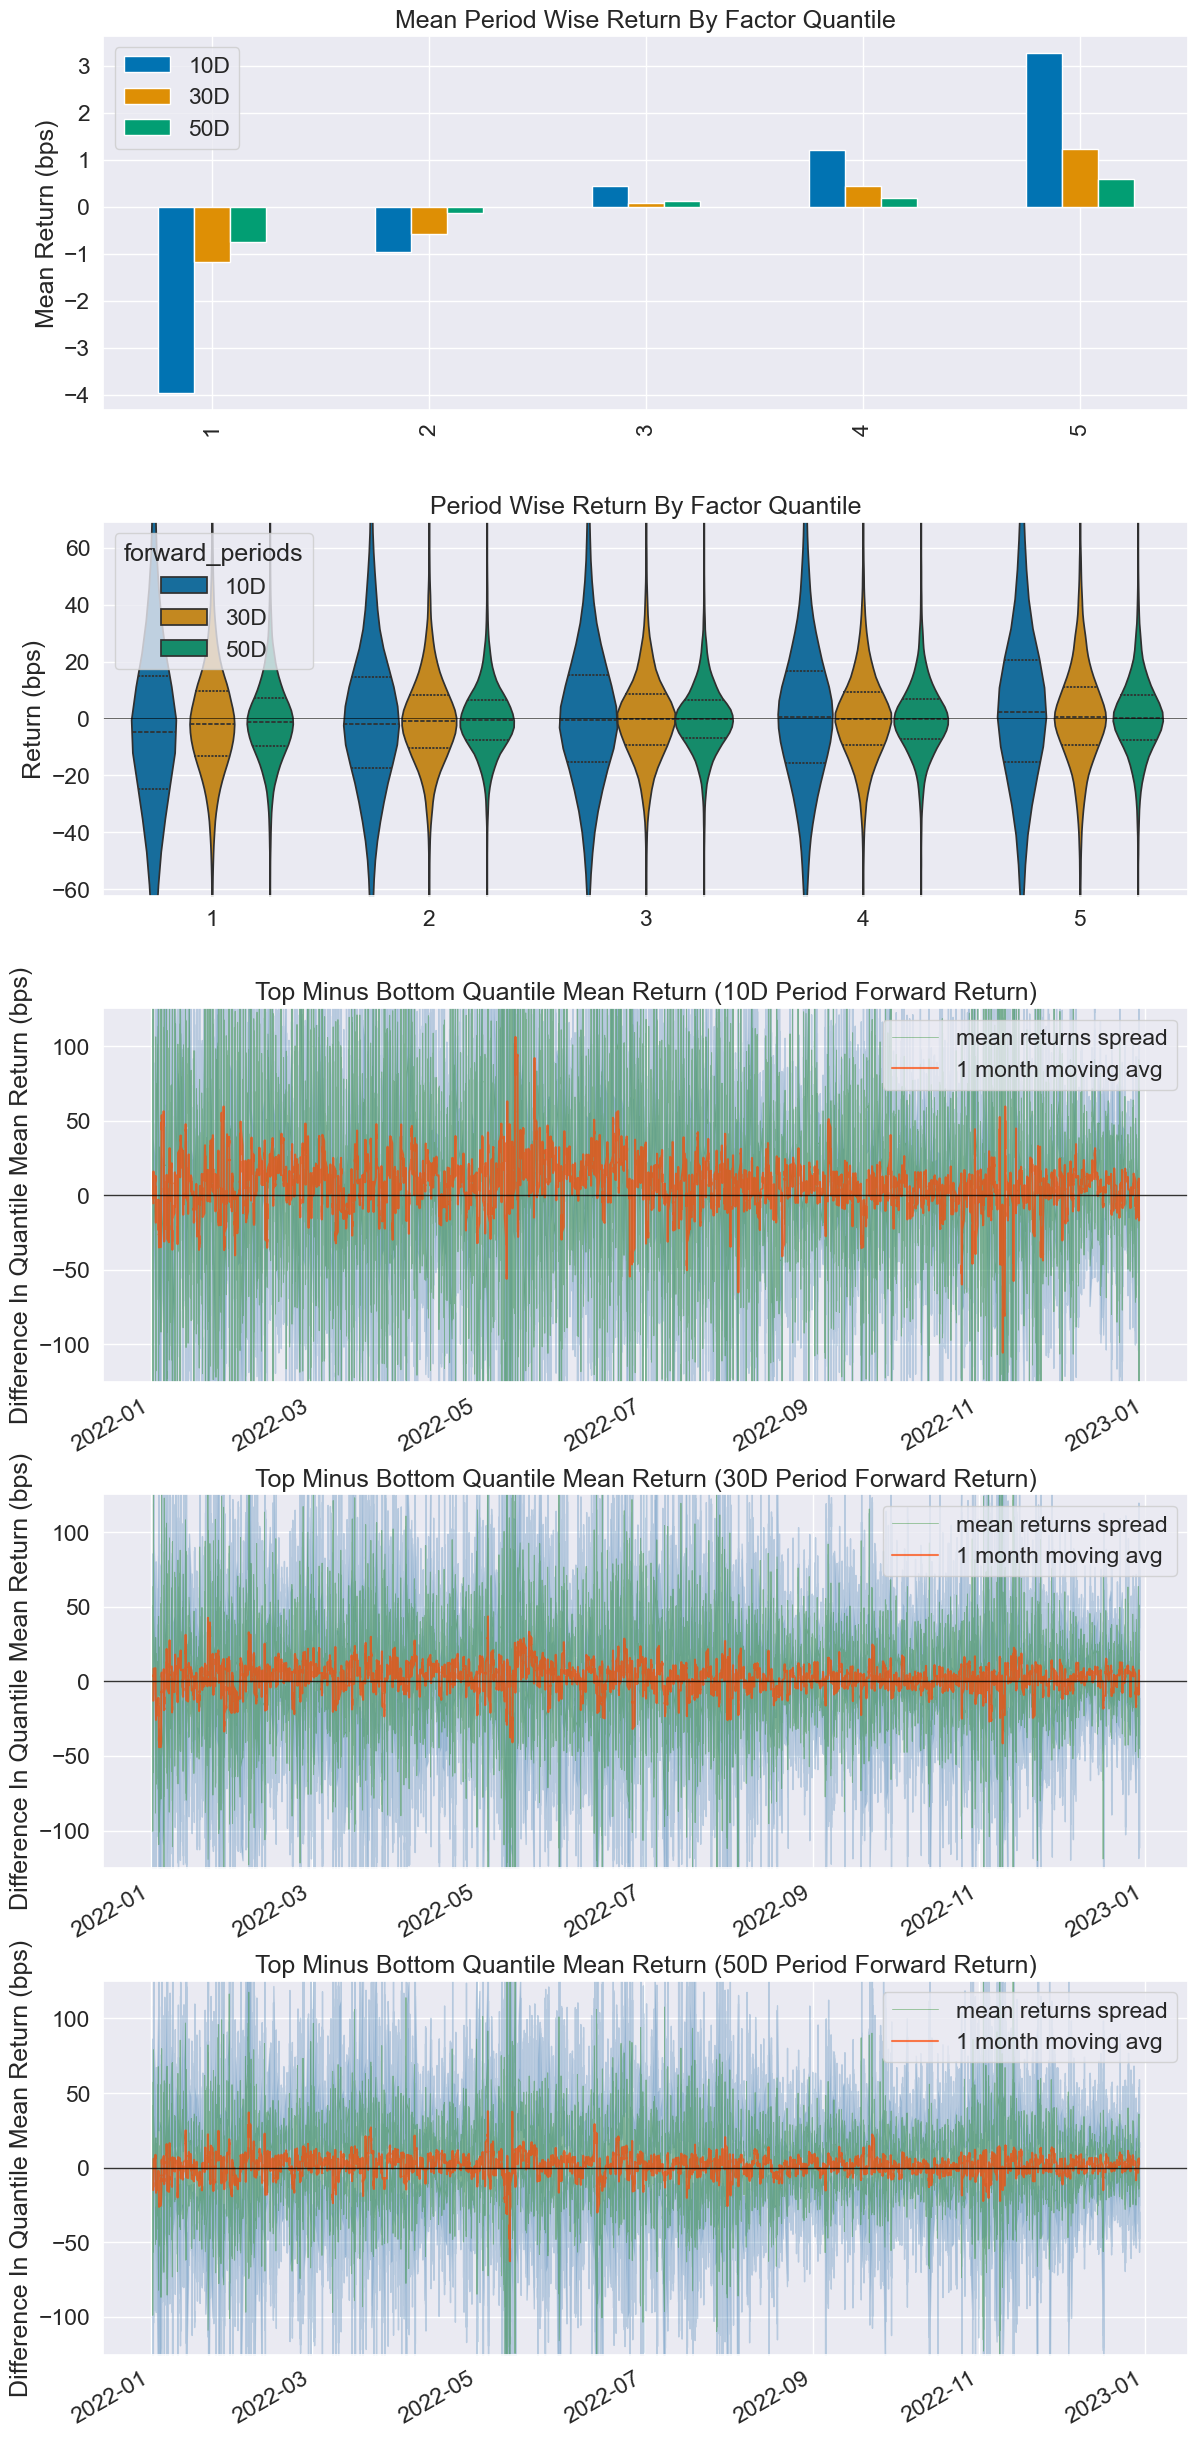

Information Analysis


10D    30D    50D
IC Mean           0.060  0.028  0.023
IC Std.           0.174  0.178  0.162
Risk-Adjusted IC  0.347  0.157  0.141
t-stat(IC)        6.604  2.998  2.693
p-value(IC)       0.000  0.003  0.007
IC Skew           0.048  0.062  0.008
IC Kurtosis      -0.168 -0.348 -0.156

D:\python3\lib\site-packages\alphalens\performance.py:118: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  grouper.append(pd.Grouper(freq=by_time))


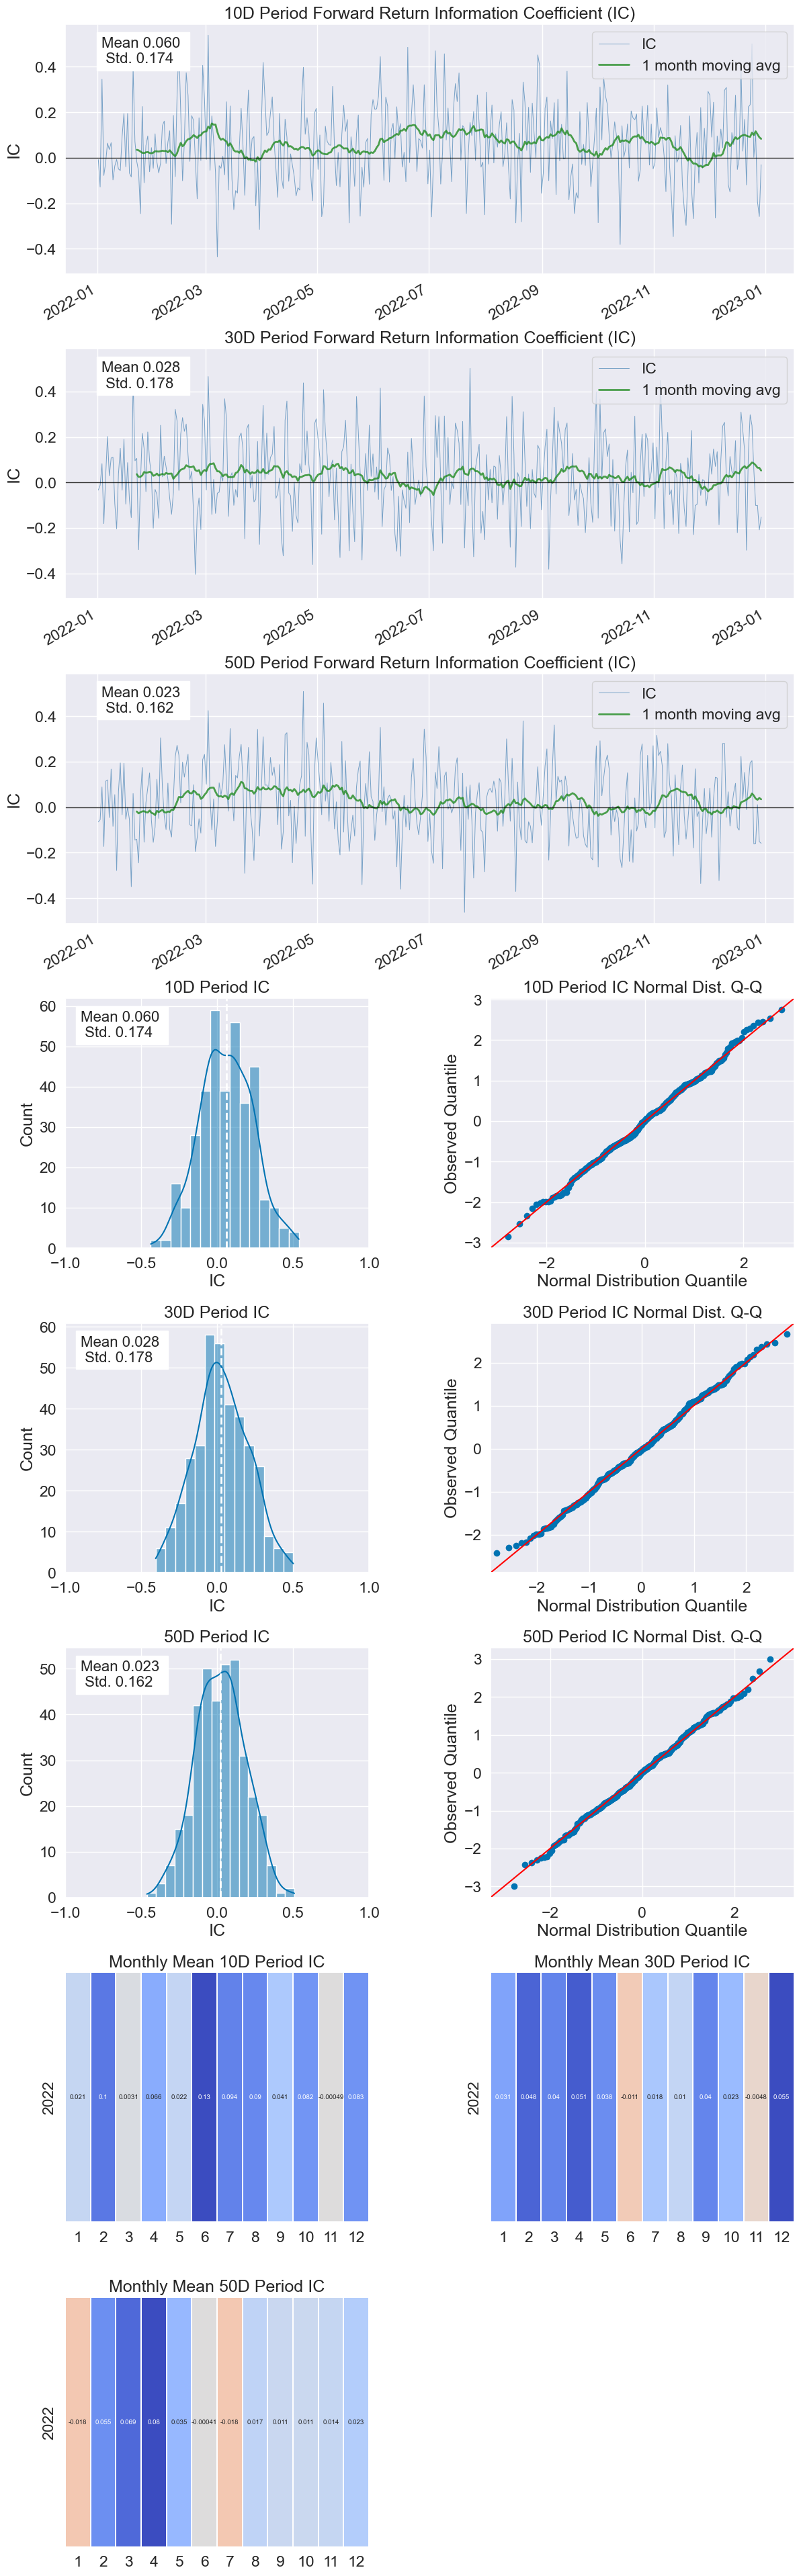

D:\python3\lib\site-packages\alphalens\utils.py:928: UserWarning: Skipping return periods that aren't exact multiples of days.
  warnings.warn(


Turnover Analysis


10D    30D    50D
Quantile 1 Mean Turnover   0.788  0.800  0.808
Quantile 2 Mean Turnover   0.787  0.803  0.807
Quantile 3 Mean Turnover   0.801  0.796  0.813
Quantile 4 Mean Turnover   0.787  0.800  0.819
Quantile 5 Mean Turnover   0.800  0.799  0.803

10D    30D    50D
Mean Factor Rank Autocorrelation -0.0 -0.019 -0.006

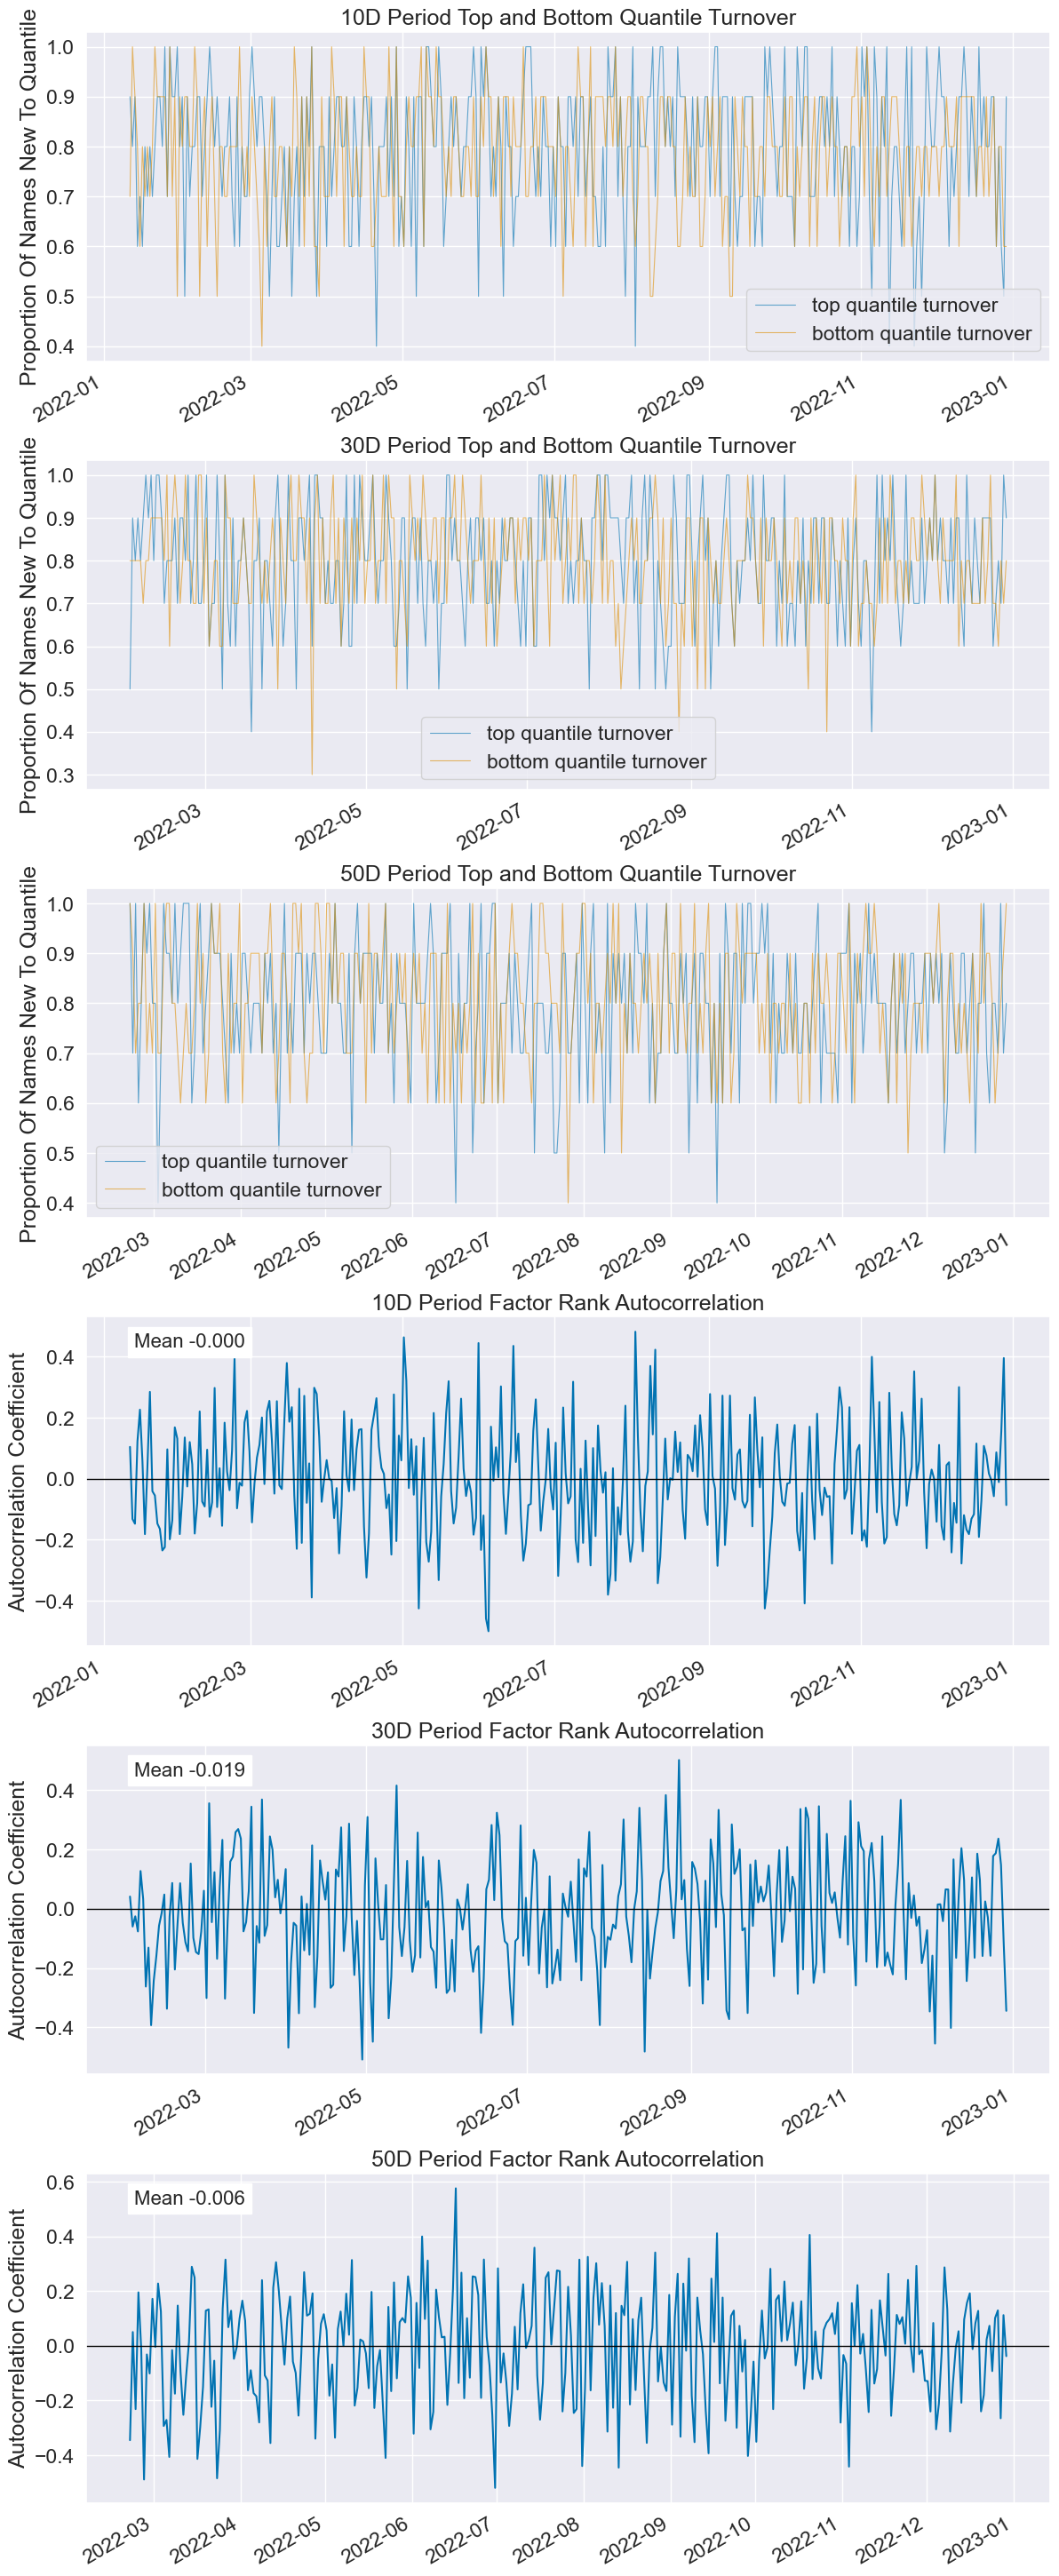

In [8]:
from alphalens.tears import create_full_tear_sheet
create_full_tear_sheet(df_al, long_short=True)

<Axes: title={'center': 'Cumulative Return by Quantile\n                    (10D Period Forward Return)'}, ylabel='Log Cumulative Returns'>

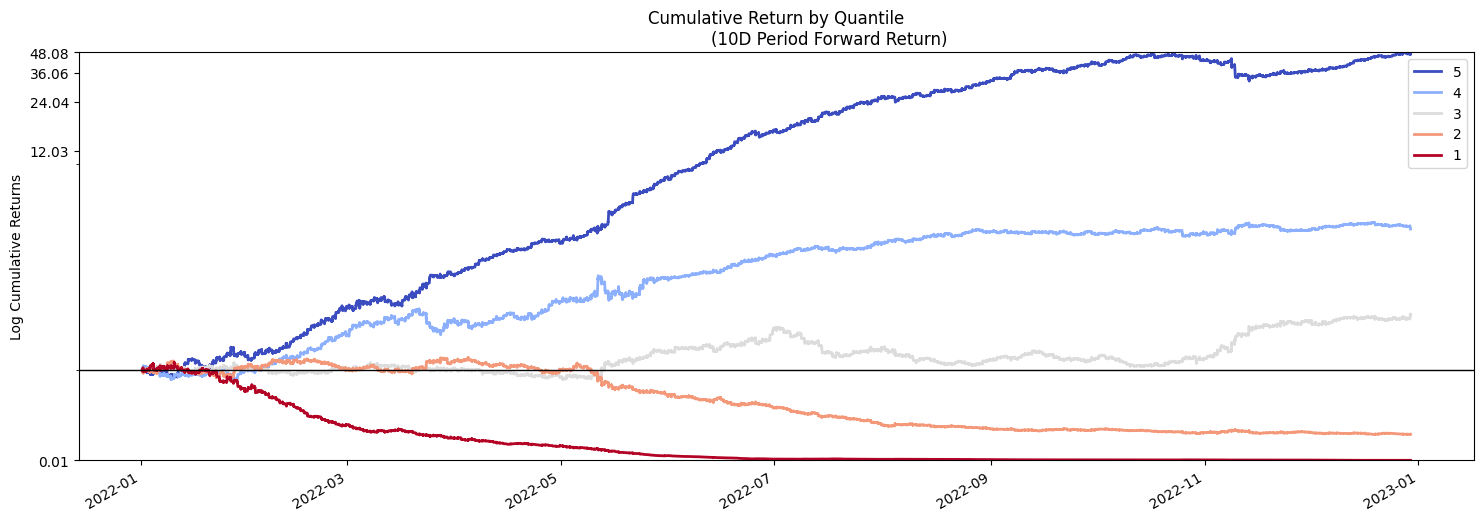

In [9]:
from alphalens.performance import mean_return_by_quantile   
from alphalens.plotting import plot_cumulative_returns_by_quantile
mean_return_by_quantile(df_al)
mean_quant_ret_bydate, std_quant_daily = mean_return_by_quantile(
    df_al,
    by_date=True,
    by_group=False,
    demeaned=True,
)

plot_cumulative_returns_by_quantile(mean_quant_ret_bydate["10D"], period="10D")

## 